<a href="https://colab.research.google.com/github/SciEcon/SoK_Blockchain_Decentralization/blob/main/code/SAI_DAI_Decentralization_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decentralization Index Data

## Preliminaries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import decimal
from datetime import datetime, date, timedelta, timezone
from dateutil.relativedelta import relativedelta
import math
import plotly.offline as py     
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import statsmodels.api as sm
import plotly.colors as pc
import statsmodels.api as sm
import re

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
#%%
Dai_ent= pd.read_csv('https://raw.githubusercontent.com/SciEcon/SoK_Blockchain_Decentralization/main/Data_TokenIndex/Dai_ent.csv', parse_dates=['date'],)

#%%
Sai_ent= pd.read_csv('https://raw.githubusercontent.com/SciEcon/SoK_Blockchain_Decentralization/main/Data_TokenIndex/Sai_ent.csv', parse_dates=['date'],)


##SAI DAI Joint Dataset Creation

Concatenated SAI and DAI at DAI Genesis Date: 2019-11-18

---



In [ ]:
SaiDai_ent = Sai_ent.iloc[:700].append(Dai_ent.drop(axis=0,index=[0,1,2,3,4]))

# Other Data Sources

CoinMetrics: Market Data

In [ ]:
#Dai
url_dai = "https://github.com/coinmetrics-io/data/raw/master/csv/dai.csv"
dai_met = pd.read_csv(url_dai,header='infer')
dai_met.to_csv('/content/drive/MyDrive/Decentralization Research/CoinMetrics/dai.csv')
#Sai
url_sai = "https://github.com/coinmetrics-io/data/raw/master/csv/sai.csv"
sai_met = pd.read_csv(url_sai,header='infer')
sai_met.to_csv('/content/drive/MyDrive/Decentralization Research/CoinMetrics/sai.csv')
#BTC
url_btc = "https://github.com/coinmetrics-io/data/raw/master/csv/btc.csv"
btc_met = pd.read_csv(url_btc,header='infer')
btc_met.to_csv('/content/drive/MyDrive/Decentralization Research/CoinMetrics/btc.csv')
#BTC
url_eth = "https://github.com/coinmetrics-io/data/raw/master/csv/eth.csv"
eth_met = pd.read_csv(url_eth,header='infer')
eth_met.to_csv('/content/drive/MyDrive/Decentralization Research/CoinMetrics/eth.csv')



NOTE: Sai and Dai do not have individual TVL, only has the TVL of MakerDAO 

#Visualization

In [ ]:
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
import plotly.offline as py     
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import statsmodels.api as sm
import plotly.colors as pc

##Timeseries

In [ ]:
fig1 = make_subplots()
fig1.add_trace(go.Scatter(x=Dai_ent.date, y=Dai_ent['SMA30'],
              mode='lines', name='Dai'))
fig1.add_trace(go.Scatter(x=Sai_ent.date, y=Sai_ent['SMA30'],
              mode='lines', name='Sai'))
fig1.update_layout(title='Decentralization Index 30 Day Moving Average' ,autosize=True,template="plotly_dark")
fig1.add_shape(
              go.layout.Shape(
                    type="line",
                    xref="x",
                    yref="y",
                    x0='2019-11-18',
                    y0=0,
                    x1='2019-11-18',
                    y1=4000,
                    name='Sai Transition',
                    line=dict(color='black', width=3, dash='dot'),
                ))
fig1.add_shape(
              go.layout.Shape(
                    type="line",
                    xref="x",
                    yref="y",
                    x0='2020-03-12',
                    y0=0,
                    x1='2020-03-12',
                    y1=4000,
                    name='Sai Transition',
                    line=dict(color='black', width=3, dash='dot'),
                ))
fig1.add_shape(
              go.layout.Shape(
                    type="line",
                    xref="x",
                    yref="y",
                    x0='2020-09-15',
                    y0=0,
                    x1='2020-09-15',
                    y1=4000,
                    name='Sai Transition',
                    line=dict(color='black', width=3, dash='dot'),
                ))
fig1.add_shape(
              go.layout.Shape(
                    type="line",
                    xref="x",
                    yref="y",
                    x0='2021-07-20',
                    y0=0,
                    x1='2021-07-20',
                    y1=4000,
                    line=dict(color='black', width=3, dash='dot'),
                ))
fig1.add_shape(
              go.layout.Shape(
                    type="line",
                    xref="x",
                    yref="y",
                    x0='2020-03-25',
                    y0=0,
                    x1='2020-03-25',
                    y1=4000,
                    line=dict(color='black', width=3, dash='dot'),
                ))
fig1.add_shape(
              go.layout.Shape(
                    type="line",
                    xref="x",
                    yref="y",
                    x0='2021-05-03',
                    y0=0,
                    x1='2021-05-03',
                    y1=4000,
                    line=dict(color='black', width=3, dash='dot'),
                ))
fig1.add_annotation(
                x='2019-11-18',
                y=1.06,
                yref='paper',
                showarrow=False,
                text='Dai Genesis')
fig1.add_annotation(
                x='2020-03-12',
                y=0.95,
                yref='paper',
                showarrow=True,
                ax=-20,
                ay=-30,
                align="center",
                text='Bitcoin Crash')
fig1.add_annotation(
                x='2020-09-15',
                y=1.06,
                yref='paper',
                showarrow=False,
                text='Re-introduce Stability Fees')
fig1.add_annotation(
                x='2021-07-20',
                y=1.06,
                yref='paper',
                showarrow=False,
                text='MakerDAO Fully Decentralized')
fig1.add_annotation(
                x='2020-03-25',
                y=1,
                yref='paper',
                showarrow=True,
                arrowsize=5,
                ax=50,
                ay=-30,
                text='Transfer Governance to MakerDAO Community')
fig1.add_annotation(
                x='2021-05-03',
                y=1,
                yref='paper',
                showarrow=True,
                arrowsize=5,
                ax=-50,
                ay=-30,
                text='Foundation Returns All Funds to DAO')
py.iplot(fig1)
fig1.write_image('SaiDai.pdf')

ValueError: ignored

In [ ]:
fig1 = make_subplots()
fig1.add_trace(go.Scatter(x=Dai_ent.date, y=Dai_ent['EMA0.3'],
              mode='lines', name='Dai'))
fig1.add_trace(go.Scatter(x=Sai_ent.date, y=Sai_ent['EMA0.3'],
              mode='lines', name='Sai'))
fig1.update_layout(title='Decentralization Index EMA0.3' ,autosize=True,)
fig1.add_shape(
              go.layout.Shape(
                    type="line",
                    xref="x",
                    yref="y",
                    x0='2019-11-18',
                    y0=0,
                    x1='2019-11-18',
                    y1=5500,
                    name='Sai Transition',
                    line=dict(color='black', width=3, dash='dot'),
                ))
fig1.add_shape(
              go.layout.Shape(
                    type="line",
                    xref="x",
                    yref="y",
                    x0='2020-03-12',
                    y0=0,
                    x1='2020-03-12',
                    y1=5500,
                    name='Sai Transition',
                    line=dict(color='black', width=3, dash='dot'),
                ))
fig1.add_shape(
              go.layout.Shape(
                    type="line",
                    xref="x",
                    yref="y",
                    x0='2020-09-15',
                    y0=0,
                    x1='2020-09-15',
                    y1=5500,
                    name='Sai Transition',
                    line=dict(color='black', width=3, dash='dot'),
                ))
fig1.add_shape(
              go.layout.Shape(
                    type="line",
                    xref="x",
                    yref="y",
                    x0='2021-07-20',
                    y0=0,
                    x1='2021-07-20',
                    y1=5500,
                    line=dict(color='black', width=3, dash='dot'),
                ))
fig1.add_shape(
              go.layout.Shape(
                    type="line",
                    xref="x",
                    yref="y",
                    x0='2020-03-25',
                    y0=0,
                    x1='2020-03-25',
                    y1=5500,
                    line=dict(color='black', width=3, dash='dot'),
                ))
fig1.add_shape(
              go.layout.Shape(
                    type="line",
                    xref="x",
                    yref="y",
                    x0='2021-05-03',
                    y0=0,
                    x1='2021-05-03',
                    y1=5500,
                    line=dict(color='black', width=3, dash='dot'),
                ))
fig1.add_annotation(
                x='2019-11-18',
                y=1.06,
                yref='paper',
                showarrow=False,
                ax = -100,
                text='Dai Genesis')
fig1.add_annotation(
                x='2020-03-12',
                y=0.95,
                yref='paper',
                showarrow=True,
                ax=-20,
                ay=-30,
                align="center",
                text='Bitcoin Crash')
fig1.add_annotation(
                x='2020-09-15',
                y=1.06,
                yref='paper',
                showarrow=False,
                text='Re-introduce Stability Fees')
fig1.add_annotation(
                x='2021-07-20',
                y=1.06,
                yref='paper',
                showarrow=False,
                text='MakerDAO Fully Decentralized')
fig1.add_annotation(
                x='2020-03-25',
                y=1,
                yref='paper',
                showarrow=True,
                arrowsize=5,
                ax=50,
                ay=-30,
                text='Transfer Governance to MakerDAO Community')
fig1.add_annotation(
                x='2021-05-03',
                y=1,
                yref='paper',
                showarrow=True,
                arrowsize=5,
                ax=-50,
                ay=-30,
                text='Foundation Returns All Funds to DAO')
py.iplot(fig1)

In [ ]:
# fig1 = make_subplots()
# fig1.add_trace(go.Scatter(x=Dai.df.date, y=Dai.df['Price_Dev'],
#               mode='lines', name='Dai'))
# fig1.add_trace(go.Scatter(x=Sai.df.date, y=Sai.df['Price_Dev'],
#               mode='lines', name='Sai'))
# fig1.update_layout(title='Price Deviation' ,autosize=True,)

In [ ]:
tvl = TVL_MAKER.copy()
tvl['date'] = pd.to_datetime(pd.to_datetime(TVL_MAKER['timestamp'], unit='s').dt.date)
tvl.drop(['timestamp', 'project'], axis=1, inplace=True)

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=tvl['date'], y=tvl['tvlUSD'],
              mode='lines', name='Dai'))
#fig1.update_layout(title='Maker TVL' ,autosize=True,)
fig1.write_image('MakerTVL.pdf')
fig1.show()

#Econometrics

 
**NOTE: according to data availability from CoinMetrics**
 
**all analysis of DAI completed for period Dec. 20, 2019 to July 31, 2021;**
 
**all analysis of SAI completed for period Jan. 22, 2018 to October 31, 2019**


In [ ]:
! pip install stargazer
! pip install pingouin

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from stargazer.stargazer import Stargazer
import pingouin
import IPython.core.display
import requests
import json 
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from math import sqrt
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from sklearn.decomposition import PCA


## Analysis with ETH and BTC

In [ ]:
class Decentralization_Analysis:
  """
    class Decentralization_Analysis:
            def __init__(self, token, metrics, BTC, ETH):
    

            :param token: the dataframe containing shannon entropy values for daily transactions
            :type token: pandas.DataFrame
            :param metrics: all market metrics of token inputed retrieved from CoinMetrics
            :type metrics: pandas.DataFrame
            :param BTC: all market metrics of Bitcoin retrieved from CoinMetrics 
            :type BTC: pandas.DataFrame
            :param ETH: all market metrics of Ethereum retrieved from CoinMetrics 
            :type ETH: pandas.DataFrame
            
  
    Public Functions:
        - ``autor``: returns autoregression of our dependent variable: decentralization index.
        - ``check_stationarity``: return Dickey Fuller test results and autocorrelation figures
        - ``heat_map``: returns correlation heatmap of variables
        - ``stargazer_reverse_eth``: displays regression results with independent variables: 
                Ether market variables; dependent variable: decentralization index
        - ``stargazer_reverse_btc``: displays regression results with independent variables: 
                Bitcoin market variables; dependent variable: decentralization index
   
    """

  def __init__(self, token, metrics, BTC, ETH):
    self.reset()
    self.token = token.copy()
    self.metrics = metrics.copy()
    self.btc = BTC.copy()
    self.eth = ETH.copy()
    self.result = None
    self.token['date'].replace(to_replace= r'\s00:00:00', value='', regex=True, inplace=True)
    
    ent_exp = pd.DataFrame()
    ent_exp['val'] = np.exp2(self.token['val'])
    ent_exp['date'] = self.token['date']
    ent_exp['n'] = range(1,ent_exp.shape[0]+1)

    ent_exp['val_pct30'] = ent_exp['val'].pct_change(30)


    columns =['time','CapMrktCurUSD', 'PriceUSD', 'VtyDayRet30d', 'TxTfrValAdjUSD', 
                            'TxTfrCnt']
    metrics1 = self.metrics[columns]
    metrics1.time=pd.to_datetime(metrics1.time)
    ent_exp.date=pd.to_datetime(ent_exp.date)
    metrics1.rename(columns={'time':'date'},inplace=True)
    metrics1.dropna(inplace=True)
    df = ent_exp.merge(metrics1,on='date')

    columns2 =['time', 'PriceUSD', 'VtyDayRet30d', 'TxTfrValAdjUSD', 
                            'TxTfrCnt']

    btc1 = self.btc[columns2]
    btc1.time=pd.to_datetime(btc1.time)
    btc1.rename(columns={'time':'date','PriceUSD':'BTC_PriceUSD','VtyDayRet30d':'BTC_VtyDayRet30d',
                         'TxTfrValAdjUSD':'BTC_TxTfrValAdjUSD','TxTfrCnt':'BTC_TxTfrCnt'},inplace=True)
    btc1.dropna(inplace=True)
    df = df.merge(btc1,on='date')
    
    eth1 = self.eth[columns2]
    eth1.time=pd.to_datetime(eth1.time)
    eth1.rename(columns={'time':'date','PriceUSD':'ETH_PriceUSD','VtyDayRet30d':'ETH_VtyDayRet30d',
                         'TxTfrValAdjUSD':'ETH_TxTfrValAdjUSD','TxTfrCnt':'ETH_TxTfrCnt'},inplace=True)
    eth1.dropna(inplace=True)
    df = df.merge(eth1,on='date')

    df['BTC_VtyDayRet30d'] = df['BTC_VtyDayRet30d'].shift(30)
    df['ETH_VtyDayRet30d'] = df['ETH_VtyDayRet30d'].shift(30)


    df['BTC_Ret'] = df['BTC_PriceUSD'].pct_change(1).shift(1)
    df['ETH_Ret'] = df['ETH_PriceUSD'].pct_change(1).shift(1)
    df['BTC_Ret7'] = df['BTC_PriceUSD'].pct_change(7).shift(1)
    df['ETH_Ret7'] = df['ETH_PriceUSD'].pct_change(7).shift(1)
    df['BTC_Ret14'] = df['BTC_PriceUSD'].pct_change(14).shift(1)
    df['ETH_Ret14'] = df['ETH_PriceUSD'].pct_change(14).shift(1)
    df['BTC_Ret21'] = df['BTC_PriceUSD'].pct_change(21).shift(1)
    df['ETH_Ret21'] = df['ETH_PriceUSD'].pct_change(21).shift(1)
    df['BTC_Ret30'] = df['BTC_PriceUSD'].pct_change(30).shift(1)
    df['ETH_Ret30'] = df['ETH_PriceUSD'].pct_change(30).shift(1)

    
    
    

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    # subset=['date','val','CapMrktCurUSD', 'PriceUSD', 'VtyDayRet30d', 'TxTfrValAdjUSD', 
    #                         'TxTfrCnt', 'BTC_PriceUSD', 'BTC_VtyDayRet30d', 'BTC_TxTfrValAdjUSD', 
    #                         'BTC_TxTfrCnt', 'ETH_PriceUSD', 'ETH_VtyDayRet30d']
    x=df[['ETH_Ret','ETH_Ret7','ETH_Ret14','ETH_Ret21','ETH_Ret30','ETH_VtyDayRet30d']]
    x2=df[['BTC_Ret','BTC_Ret7','BTC_Ret14','BTC_Ret21','BTC_Ret30','BTC_VtyDayRet30d']]
    pca = PCA(n_components=1)
    df['ETH_PC'] = pca.fit_transform(x)
    df['BTC_PC'] = pca.fit_transform(x2)
    self.df = df.copy()

  def autor(self):
    variables = ['val']
    ar_model = AutoReg(self.df.val, lags=5).fit()
    print(ar_model.summary())
 
  def check_stationarity(self, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    variables = ['val']
    variables.extend(['ETH_Ret','ETH_Ret7','ETH_Ret14','ETH_Ret21','ETH_Ret30','ETH_VtyDayRet30d','ETH_PC',
                    'BTC_Ret','BTC_Ret7','BTC_Ret14','BTC_Ret21','BTC_Ret30','BTC_VtyDayRet30d','BTC_PC'])
    significant = []
    fig = plot_pacf(self.df['val'].dropna(), lags=lags_plots, zero=False, method='ols', color='teal',title='Partial Autocorrelation');
    fig.savefig('PAC.pdf') 
    for y in variables:
      select = self.df[y][self.df[y]!=0]   ##Some rates data on DeFi pulse is missing have '0' value
      if select.empty:
        continue
      col = pd.Series(select.dropna())
      # fig = plt.figure()

      # ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
      # ax2 = plt.subplot2grid((3, 3), (1, 0))
      # ax3 = plt.subplot2grid((3, 3), (1, 1))
      # ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)
      # col.plot(ax=ax1, figsize=figsize, color='teal')
      # ax1.set_title(y)
      # plot_acf(col, lags=lags_plots, zero=False, ax=ax2, color='teal');
      # fig = plot_pacf(col, lags=lags_plots, zero=False, method='ols', color='teal',title=y);
      # # sns.distplot(col, bins=int(sqrt(len(col))), ax=ax4, color='teal')
      # fig.set_title('Partial Autocorrelation')

      # plt.tight_layout()
      
      print('Dickey-Fuller test results:')
      adfinput = adfuller(col)
      adftest = pd.Series(adfinput[0:4], index=['Statistical Test','P-Value','Used Lags','Observations Number'])
      if adftest.loc['P-Value'] < 0.05:
        significant.append(y)
      adftest = round(adftest,4)
      
      for key, value in adfinput[4].items():
          adftest["Critical Values (%s)"%key] = value.round(4)  
      print(adftest)
      fig.show()

    print("Stationary Variables:", significant)

  def heat_map(self):
    corr_columns = ['ETH_Ret','ETH_Ret7','ETH_Ret14','ETH_Ret21','ETH_Ret30','ETH_VtyDayRet30d','ETH_PC',
                    'BTC_Ret','BTC_Ret7','BTC_Ret14','BTC_Ret21','BTC_Ret30','BTC_VtyDayRet30d','BTC_PC']
    plt.figure(figsize=(12, 6))
    
    mask = np.triu(np.ones_like(self.df[corr_columns].corr(), dtype=np.bool))
    heatmap = sns.heatmap(self.df[corr_columns].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu') 
    # heatmap.set_title('Triangle Correlation Heatmap: Market Return and Volatility', fontdict={'fontsize':18}, pad=16);
    plt.savefig('Return_Heatmap.pdf', bbox_inches="tight", pad_inches=1) 

  def regression(self, decentralized, economical):
      a = self.df[[decentralized,economical]].copy()
      # add lag term for dependent variable
      a['lag_term'] = a[economical].shift(-1)
      a.dropna(inplace=True)
      X = a[[decentralized,'lag_term']][a[economical]!=0] 
      y = a[economical][a[economical]!=0]  ##Some rates data on DeFi pulse is missing have '0' value
      if y.empty:
        return 1
    # add a constant to the dependent variables
      X = sm.add_constant(X)
    # conduct regression
      model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':1}) #Newey–West estimator
      return model

  def regression_rev(self, decentralized, economical):
      a = self.df[[decentralized,economical]].copy()
      a.dropna(inplace=True)
      y = a[decentralized][a[economical]!=0] 
      X = a[economical][a[economical]!=0]  ##Some rates data on DeFi pulse is missing have '0' value
      if y.empty:
        return 1
    # add a constant to the dependent variables
      X = sm.add_constant(X)
    # conduct regression
      model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':1}) #Newey–West estimator
      return model

  def stargazer_reverse_eth(self):
    # variables = list(self.df.columns[8:])
    variables =['ETH_Ret','ETH_Ret7','ETH_Ret14','ETH_Ret21','ETH_Ret30','ETH_VtyDayRet30d','ETH_PC']
    lis = ["val"]
    for j in lis:
      independent = list()
      for i in variables:
        i = self.regression_rev (j,i)
        independent.append(i)
     
      
      # if 1 in lis:
      #   continue
      stargazer_result = Stargazer(independent)
      stargazer_result.significant_digits(3)
      stargazer_result.show_confidence_intervals(False)
      covariates = variables.copy()
      covariates.append('const')
      
      stargazer_result.covariate_order(covariates)
      file_name = "ETH.tex" #Include directory path if needed
      tex_file = open(file_name, "w" ) #This will overwrite an existing file
      tex_file.write( stargazer_result.render_latex() )
      tex_file.close()
      file = "ETH.html" #Include directory path if needed
      html_file = open(file, "w" ) #This will overwrite an existing file
      html_file.write( stargazer_result.render_html() )
      html_file.close()
      display(HTML(stargazer_result.render_html()))

  def stargazer_reverse_btc(self):
    # variables = list(self.df.columns[8:])
    variables =['BTC_Ret','BTC_Ret7','BTC_Ret14','BTC_Ret21','BTC_Ret30','BTC_VtyDayRet30d','BTC_PC']
    lis = ["val"]
    for j in lis:
      independent = list()
      for i in variables:
        i = self.regression_rev (j,i)
        independent.append(i)
     
      
      # if 1 in lis:
      #   continue
      stargazer_result = Stargazer(independent)
      stargazer_result.significant_digits(3)
      stargazer_result.show_confidence_intervals(False)
      covariates = variables.copy()
      covariates.append('const')
      
      stargazer_result.covariate_order(covariates)
      file_name = "BTC.tex" #Include directory path if needed
      tex_file = open(file_name, "w" ) #This will overwrite an existing file
      tex_file.write( stargazer_result.render_latex() )
      tex_file.close()
      file = "BTC.html" #Include directory path if needed
      html_file = open(file, "w" ) #This will overwrite an existing file
      html_file.write( stargazer_result.render_html() )
      html_file.close()
      display(HTML(stargazer_result.render_html()))
      
  def reset(self):
      self.token = None
      self.metrics = None
      self.df = None
      self.tvl = None


In [ ]:
Sai2 = Decentralization_Analysis(Sai_ent, sai_met, btc_met, eth_met)
Dai2 = Decentralization_Analysis(Dai_ent, dai_met, btc_met, eth_met)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retur

In [ ]:
Sai2.df

,val,date,n,val_pct30,CapMrktCurUSD,PriceUSD,VtyDayRet30d,TxTfrValAdjUSD,TxTfrCnt,BTC_PriceUSD,BTC_VtyDayRet30d,BTC_TxTfrValAdjUSD,BTC_TxTfrCnt,ETH_PriceUSD,ETH_VtyDayRet30d,ETH_TxTfrValAdjUSD,ETH_TxTfrCnt,BTC_Ret,ETH_Ret,BTC_Ret7,ETH_Ret7,BTC_Ret14,ETH_Ret14,BTC_Ret21,ETH_Ret21,BTC_Ret30,ETH_Ret30,ETH_PC,BTC_PC
31,188.810443,2018-02-22,67,-0.123246,1.771949e+07,1.005000,0.002950,6.007286e+06,418,9878.158943,0.071108,5.320435e+09,555475.0,807.076899,0.073895,2.804218e+09,477456.0,-0.069987,-0.050687,0.104736,-0.086692,0.371727,0.114150,0.040673,-0.233143,-0.025936,-0.152585,-0.167701,0.161640
32,203.019391,2018-02-23,68,-0.041877,1.852419e+07,1.005000,0.002950,4.471814e+06,499,10159.065613,0.071504,3.719724e+09,472286.0,855.767194,0.073703,1.763113e+09,459682.0,-0.055523,-0.039957,-0.022616,-0.132053,0.201930,-0.001699,0.092733,-0.208105,-0.089520,-0.180810,-0.228657,0.052408
33,153.907385,2018-02-24,69,-0.342585,1.857489e+07,1.005000,0.002950,2.089031e+06,252,9686.601780,0.067937,2.578483e+09,405255.0,834.002846,0.073747,1.889097e+09,407946.0,0.028437,0.060329,-0.002969,-0.088969,0.173041,-0.020376,0.156269,-0.062503,-0.095033,-0.182742,-0.139212,0.080657
34,61.093661,2018-02-25,70,-0.690692,1.914041e+07,1.005000,0.002950,9.469742e+05,148,9603.227477,0.067911,1.664269e+09,405647.0,842.311720,0.073664,9.236595e+08,398722.0,-0.046507,-0.025433,-0.126199,-0.144816,0.135553,-0.019645,0.060720,-0.132055,-0.129722,-0.200857,-0.206042,-0.042520
35,76.967589,2018-02-26,71,-0.571438,1.962054e+07,1.005000,0.002950,1.621146e+06,180,10312.365713,0.067154,2.722494e+09,519234.0,865.863039,0.073474,1.512570e+09,489705.0,-0.008607,0.009963,-0.081215,-0.079753,0.186063,0.033786,0.163953,0.006740,-0.129792,-0.190449,-0.079717,0.050083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2420.100382,2019-11-26,709,-0.239091,8.489666e+07,1.003901,0.002169,2.111336e+07,8489,7165.437730,0.038779,2.210674e+09,710520.0,147.942879,0.037964,1.991650e+08,274343.0,0.028180,0.035215,-0.127633,-0.176905,-0.180664,-0.205275,-0.242008,-0.212177,-0.228182,-0.184499,-0.325820,-0.416353
674,2547.806589,2019-11-27,710,0.117641,8.387683e+07,0.995523,0.002642,2.567266e+07,9809,7526.863817,0.039174,2.143191e+09,700717.0,153.248322,0.038017,3.524941e+08,268287.0,0.003697,0.009420,-0.117211,-0.156709,-0.184723,-0.207072,-0.232065,-0.218132,-0.250333,-0.198456,-0.335822,-0.425260
675,1184.183065,2019-11-28,711,-0.396677,8.437744e+07,0.999706,0.002758,2.250259e+07,7225,7436.336382,0.038991,1.430809e+09,683235.0,151.010392,0.038444,3.337904e+08,266008.0,0.050440,0.035861,-0.068060,-0.121332,-0.141429,-0.184994,-0.195412,-0.199984,-0.192325,-0.161726,-0.283819,-0.335568
676,1259.577317,2019-11-29,712,-0.294279,8.454597e+07,1.005388,0.002952,2.052543e+07,6999,7747.738042,0.039195,1.942321e+09,666194.0,154.256289,0.037999,2.079736e+08,296888.0,-0.012027,-0.014603,-0.023113,-0.060462,-0.139854,-0.182696,-0.192646,-0.191466,-0.211518,-0.208667,-0.297351,-0.338157


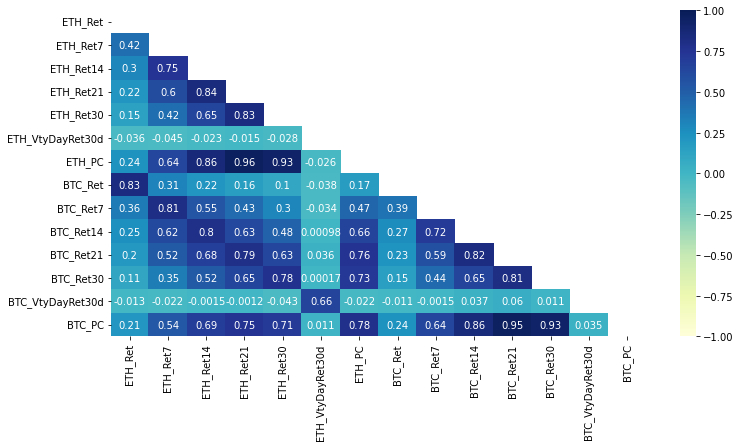

In [ ]:
Sai2.heat_map()

In [ ]:
Sai2.autor()

                            AutoReg Model Results                             
Dep. Variable:                    val   No. Observations:                  647
Model:                     AutoReg(5)   Log Likelihood               -5029.604
Method:               Conditional MLE   S.D. of innovations            611.146
Date:                Sat, 05 Feb 2022   AIC                          10073.208
Time:                        18:41:50   BIC                          10104.460
Sample:                             5   HQIC                         10085.336
                                  647                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.5451     35.995      3.321      0.001      48.997     190.093
val.L1         0.6815      0.039     17.419      0.000       0.605       0.758
val.L2        -0.1156      0.047     -2.435      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: ignored

Dickey-Fuller test results:
Statistical Test          -4.1026
P-Value                    0.0010
Used Lags                  7.0000
Observations Number      639.0000
Critical Values (1%)      -3.4406
Critical Values (5%)      -2.8661
Critical Values (10%)     -2.5692
dtype: float64
Dickey-Fuller test results:
Statistical Test          -9.7524
P-Value                    0.0000
Used Lags                  4.0000
Observations Number      642.0000
Critical Values (1%)      -3.4406
Critical Values (5%)      -2.8661
Critical Values (10%)     -2.5692
dtype: float64
Dickey-Fuller test results:
Statistical Test          -6.0732
P-Value                    0.0000
Used Lags                 19.0000
Observations Number      627.0000
Critical Values (1%)      -3.4408
Critical Values (5%)      -2.8662
Critical Values (10%)     -2.5692
dtype: float64
Dickey-Fuller test results:
Statistical Test          -5.0231
P-Value                    0.0000
Used Lags                 19.0000
Observations Number      62

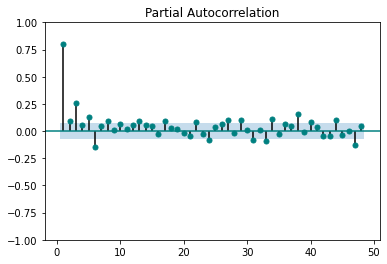

In [ ]:
Sai2.check_stationarity()

In [ ]:
Sai2.stargazer_reverse_eth()

In [ ]:
Sai2.stargazer_reverse_btc()

In [ ]:
Dai2.autor()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                            AutoReg Model Results                             
Dep. Variable:                    val   No. Observations:                  559
Model:                     AutoReg(5)   Log Likelihood               -4418.014
Method:               Conditional MLE   S.D. of innovations            703.323
Date:                Sat, 05 Feb 2022   AIC                           8850.028
Time:                        18:35:26   BIC                           8880.248
Sample:                             5   HQIC                          8861.833
                                  559                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        228.7253     53.853      4.247      0.000     123.176     334.275
val.L1         0.4897      0.042     11.563      0.000       0.407       0.573
val.L2         0.0955      0.047      2.046      0.0

Dickey-Fuller test results:
Statistical Test          -3.5444
P-Value                    0.0069
Used Lags                  8.0000
Observations Number      551.0000
Critical Values (1%)      -3.4423
Critical Values (5%)      -2.8668
Critical Values (10%)     -2.5696
dtype: float64
Dickey-Fuller test results:
Statistical Test          -6.2575
P-Value                    0.0000
Used Lags                 12.0000
Observations Number      547.0000
Critical Values (1%)      -3.4424
Critical Values (5%)      -2.8668
Critical Values (10%)     -2.5696
dtype: float64
Dickey-Fuller test results:
Statistical Test          -4.9812
P-Value                    0.0000
Used Lags                 17.0000
Observations Number      542.0000
Critical Values (1%)      -3.4425
Critical Values (5%)      -2.8669
Critical Values (10%)     -2.5696
dtype: float64
Dickey-Fuller test results:
Statistical Test          -3.7503
P-Value                    0.0035
Used Lags                 14.0000
Observations Number      54

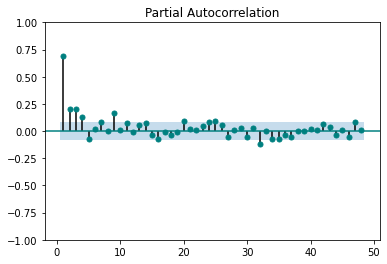

In [ ]:
Dai2.check_stationarity()

In [ ]:
Dai2.stargazer_reverse_eth()

In [ ]:
Dai2.stargazer_reverse_btc()